In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


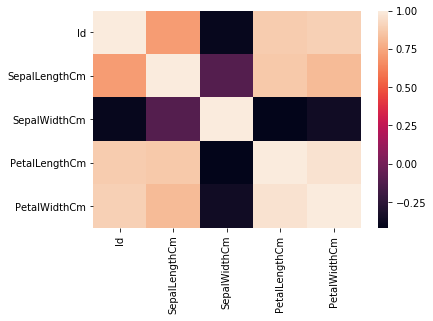

In [3]:
sns.heatmap(df.corr())

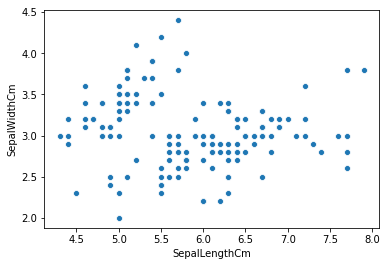

In [4]:
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'])

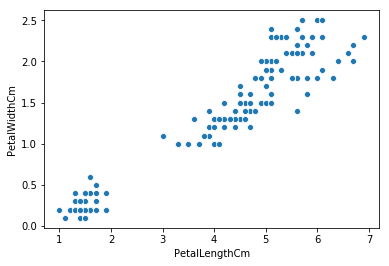

In [5]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'])

In [6]:
x = df.iloc[:,1:5].values
y = df.Species.values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.84


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.92


In [11]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.88


In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.96


In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.96


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.96
